In [251]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GOAL: Create usable biomechanics data visualization for Player
# GOAL: Create correlations and predictive models for fastball tilt based on biomechanical metrics

# Read in excel and csv files and combine Data Frames

df1 = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\bullpenTM.csv')
df2 = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\wake_scrims.csv')
df3 = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\wakeData.csv')

dfs = [df1, df2, df3]

df = pd.concat(dfs, axis=0,ignore_index=True)
df = df.drop(columns=['Pitcher'])
df

C:\Users\joeym\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PitchNo,Year,Date,Time,PitcherId,PitcherThrows,PitcherTeam,PitcherSet,TaggedPitchType,PitchSession,...,HotColdPoints,cluster,clusterSC,TrueSpin,szTop,szBot,isScrimmage,DateForBatters,DateForPitchers,Throws
0,1,Fall_2020,8/27/20,14:17:42,1.000073e+09,Left,WAK_DEA,Stretch,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Fall_2020,8/27/20,14:20:14,1.000073e+09,Left,WAK_DEA,Stretch,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Fall_2020,8/27/20,14:21:01,1.000073e+09,Left,WAK_DEA,Stretch,ChangeUp,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Fall_2020,8/27/20,14:21:26,1.000073e+09,Left,WAK_DEA,Stretch,ChangeUp,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,Fall_2020,8/27/20,14:21:48,1.000073e+09,Left,WAK_DEA,Stretch,ChangeUp,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34730,172,Fall_2020,11/12/2020,4:52:12 PM,8.899270e+06,Right,WAK_DEA,Windup,Curveball,NaN,...,NaN,NaN,NaN,866.111759,NaN,NaN,NaN,NaN,NaN,NaN
34731,173,Fall_2020,11/12/2020,4:52:26 PM,8.899270e+06,Right,WAK_DEA,Windup,Fastball,NaN,...,NaN,NaN,NaN,2428.490418,NaN,NaN,NaN,NaN,NaN,NaN
34732,174,Fall_2020,11/12/2020,4:52:46 PM,8.899270e+06,Right,WAK_DEA,Windup,Curveball,NaN,...,NaN,NaN,NaN,1276.358339,NaN,NaN,NaN,NaN,NaN,NaN
34733,175,Fall_2020,11/12/2020,4:53:02 PM,8.899270e+06,Right,WAK_DEA,Windup,Fastball,NaN,...,NaN,NaN,NaN,2431.528521,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
# Filter out desired pitcher

options = [1000092978, 10018957]
playerdf = df[df['PitcherId'].isin(options)]

# Filter out just player's fastballs

playerfb = playerdf[playerdf['TaggedPitchType'].str.contains('Fastball|Sinker')]
playerfb

,PitchNo,Year,Date,Time,PitcherId,PitcherThrows,PitcherTeam,PitcherSet,TaggedPitchType,PitchSession,...,HotColdPoints,cluster,clusterSC,TrueSpin,szTop,szBot,isScrimmage,DateForBatters,DateForPitchers,Throws
79,1,Fall_2020,8/28/20,17:07:37,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,2,Fall_2020,8/28/20,17:08:19,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,4,Fall_2020,8/28/20,17:10:09,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,5,Fall_2020,8/28/20,17:10:53,1.001896e+07,Right,WAK_DEA,Windup,Sinker,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,6,Fall_2020,8/28/20,17:11:24,1.001896e+07,Right,WAK_DEA,Windup,Sinker,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34066,275,Fall_2020,10/23/2020,6:22:44 PM,1.000093e+09,Right,WAK_DEA,Stretch,Sinker,NaN,...,NaN,NaN,NaN,1838.586882,NaN,NaN,NaN,NaN,NaN,NaN
34067,276,Fall_2020,10/23/2020,6:23:35 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,NaN,NaN,NaN,2217.636829,NaN,NaN,NaN,NaN,NaN,NaN
34068,277,Fall_2020,10/23/2020,6:24:12 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,NaN,NaN,NaN,2148.173452,NaN,NaN,NaN,NaN,NaN,NaN
34069,278,Fall_2020,10/23/2020,6:24:42 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,0.5,NaN,NaN,2049.617728,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='HorzBreak', ylabel='InducedVertBreak'>

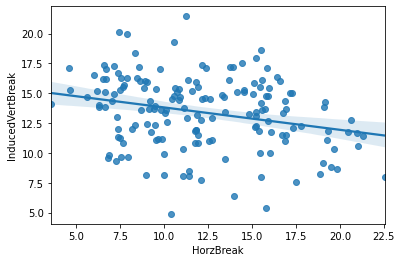

In [253]:
# Plot InducedVertBreak and HorzBreak

sns.regplot(x="HorzBreak", y="InducedVertBreak", data=playerfb)

<AxesSubplot:xlabel='RelHeight', ylabel='InducedVertBreak'>

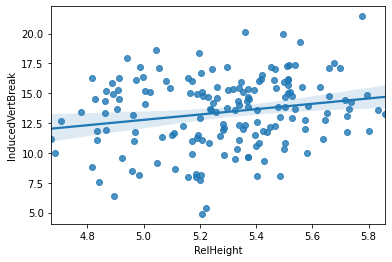

In [254]:
# Plot InducedVertBreak per Release Height

sns.regplot(x="RelHeight", y="InducedVertBreak", data=playerfb)

<AxesSubplot:xlabel='RelHeight', ylabel='SpinAxis'>

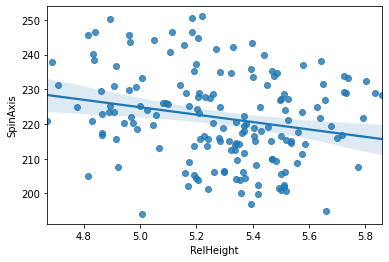

In [255]:
# Plot Spin Axis per Release Height

sns.regplot(x="RelHeight", y="SpinAxis", data=playerfb)

In [256]:
# Read in biomech data

biomechdf = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\Roosevelt Project\teddybiomechdata.csv')
biomechdf = biomechdf.drop(columns=['Pitcher'])
biomechdf

,Drive,Users,User,Location,Project,Data,Session,PitchType,Item,Lead_Knee_Ang_Vel_Max,...,ReleaseTime_ms,STRIDE_LENGTH,Pelvis_Ang_Vel_max,Pitching_Hand_Ang_Vel_max,Pitching_Humerus_Ang_Vel_max,Thorax_Ang_Vel_max,BALL_RELEASE_SPEED,Pelvis_Ang_Vel@Footstrike,Pelvis_Ang_Vel@Max_Shoulder_Rot,Pelvis_Ang_Vel@Release
0,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Breaking Ball RH 1.c3d,1,498.706879,...,696.666748,1.460189,823.881958,2922.907471,5550.698242,1055.038208,36.523167,703.33057,389.53143,15.47536
1,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Breaking Ball RH 3.c3d,1,526.756958,...,716.666687,1.461492,778.864136,3067.819336,5717.079590,1109.804810,36.076126,625.09119,312.16071,2.21628
2,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Breaking Ball RH 4.c3d,1,498.706848,...,699.999817,1.460189,823.882202,2922.907471,5550.698242,1055.038208,36.523167,703.33057,389.53149,-3.66026
3,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 1.c3d,1,496.104614,...,683.333374,1.438083,864.825134,4120.759277,6050.747559,1133.019897,40.680641,710.31708,293.22281,-55.03012
4,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 2.c3d,1,499.300354,...,710.000061,1.453500,844.792603,4041.982666,6110.809570,1131.019531,40.948864,699.73462,380.65369,13.33078
5,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 3.c3d,1,521.821655,...,676.666748,1.446892,847.812134,4016.141113,6024.631348,1173.211670,40.993568,717.32056,296.79138,-37.82129
6,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 4.c3d,1,513.016418,...,706.666687,1.461673,861.550903,4038.362549,5859.315430,1119.224731,40.457119,733.16339,399.98898,-1.23986
7,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 5.c3d,1,526.332703,...,719.999817,1.485021,842.091064,4050.095459,6143.952637,1162.086060,41.619423,717.82068,351.66895,-14.31078
8,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 6.c3d,1,537.667725,...,669.999817,1.452333,850.319458,4083.783203,6181.902832,1173.505859,41.440609,692.33978,392.62067,-16.54639
9,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Off Speed RH 1.c3d,1,499.656860,...,713.333130,1.490067,831.639893,4094.127197,5725.454590,1112.084106,38.400738,695.47968,286.84027,-69.38612


In [257]:
# Function to calculate mph from m/s
def PitchVelo(biomechdf):
    return biomechdf['BALL_RELEASE_SPEED'] * 0.000621 / 0.000278

biomechdf['PitchVelo'] = biomechdf[['BALL_RELEASE_SPEED']].apply(PitchVelo, axis=1)
biomechdf['PitchVelo'] = biomechdf['PitchVelo'].round(1)

# Filter biomech data for only fastballs
biomechfast = biomechdf[biomechdf['PitchType'].str.contains('Fastball')]
biomechfast

,Drive,Users,User,Location,Project,Data,Session,PitchType,Item,Lead_Knee_Ang_Vel_Max,...,STRIDE_LENGTH,Pelvis_Ang_Vel_max,Pitching_Hand_Ang_Vel_max,Pitching_Humerus_Ang_Vel_max,Thorax_Ang_Vel_max,BALL_RELEASE_SPEED,Pelvis_Ang_Vel@Footstrike,Pelvis_Ang_Vel@Max_Shoulder_Rot,Pelvis_Ang_Vel@Release,PitchVelo
3,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 1.c3d,1,496.104614,...,1.438083,864.825134,4120.759277,6050.747559,1133.019897,40.680641,710.31708,293.22281,-55.03012,90.9
4,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 2.c3d,1,499.300354,...,1.453500,844.792603,4041.982666,6110.809570,1131.019531,40.948864,699.73462,380.65369,13.33078,91.5
5,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 3.c3d,1,521.821655,...,1.446892,847.812134,4016.141113,6024.631348,1173.211670,40.993568,717.32056,296.79138,-37.82129,91.6
6,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 4.c3d,1,513.016418,...,1.461673,861.550903,4038.362549,5859.315430,1119.224731,40.457119,733.16339,399.98898,-1.23986,90.4
7,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 5.c3d,1,526.332703,...,1.485021,842.091064,4050.095459,6143.952637,1162.086060,41.619423,717.82068,351.66895,-14.31078,93.0
8,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 6.c3d,1,537.667725,...,1.452333,850.319458,4083.783203,6181.902832,1173.505859,41.440609,692.33978,392.62067,-16.54639,92.6
12,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_4,Fastball RH 1.c3d,1,439.699280,...,1.447372,824.085022,4638.705566,5756.671387,1112.254028,40.591232,686.52472,267.03406,86.99506,90.7
13,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_4,Fastball RH 11.c3d,1,425.936615,...,1.463048,802.445862,4541.577148,5842.132324,1153.317749,38.892479,661.59973,124.68141,-88.71880,86.9
14,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_4,Fastball RH 12.c3d,1,457.883392,...,1.426435,807.443237,4615.117676,5733.791016,1137.947876,40.144192,592.07642,481.70370,15.79149,89.7
15,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_4,Fastball RH 13.c3d,1,472.394409,...,1.477871,834.251282,4998.024902,6010.933594,1161.783447,40.099487,680.87726,155.19568,-51.08969,89.6


In [258]:
#biomechfast.to_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\Roosevelt Project\teddybiomechonly.csv')

In [259]:
# RUN JOINT KINETICS ON REPORT (ALL) FOR JOINT KINETICS
# Run joint kinetics csv through data cleaning script
# Manually added PitchUIDs to each pitch

In [260]:
biomechfast = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\Roosevelt Project\teddybiomechPitchUID.csv')

In [261]:
# Read in recalculated joint kinetics data frame
jointrightdf = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\Roosevelt Project\cleanteddykinetics.csv')
jointrightdf = jointrightdf.drop(columns=['Pitcher'])
jointrightdf

# Pull joint kinetics metrics from that report instead
# Then merge on "PitchUID"

,Unnamed: 0,MoCap Session,Pitch Type,BALL_RELEASE_SPEED_X,BALL_RELEASE_SPEED_mph_X,PitchUID,RElbow_Valgus_Max_X,RShoulder_Distraction_Force_Max_X,RWrist_Angle_at_Ext_Rotation_X,RWrist_Angle_at_Ext_Rotation.1_Y,...,RWrist_Torque_at_ReleasePlus10_X,RWrist_Torque_at_ReleasePlus10.1_Y,RWrist_Torque_at_ReleasePlus10.2_Z,RWrist_Torque_at_ReleasePlus100_X,RWrist_Torque_at_ReleasePlus100.1_Y,RWrist_Torque_at_ReleasePlus100.2_Z,RForearm_Torque_at_Ext_Rotation_Z,RForearm_Torque_at_Release_Z,RForearm_Torque_at_ReleasePlus10_Z,RForearm_Torque_at_ReleasePlus100_Z
0,0,Baseball Right-handed_3,Fastball,40.680641,91.0,d7d1acf9-02d0-44e9-8797-6bf1148ad508,0.311274,11.284216,-44.500378,2.213984,...,0.014002,0.027256,-0.020687,-0.071318,0.034989,-0.039127,0.682389,-0.030901,0.056470,-0.066563
1,1,Baseball Right-handed_3,Fastball,40.948864,91.6,d1d55a2c-4dd8-4361-aee3-035b7935960e,0.225723,11.239290,-42.934502,1.374424,...,0.015769,0.020906,-0.020336,-0.054357,-0.009730,0.008515,0.716938,-0.022820,0.064088,-0.007631
2,2,Baseball Right-handed_3,Fastball,40.993568,91.7,21bb7443-3575-40e3-b46d-6544ef1dbd64,0.333708,11.184565,-42.937103,2.224754,...,0.016419,0.020914,-0.017871,-0.081573,0.030569,-0.036433,0.708873,-0.024996,0.059301,-0.072892
3,3,Baseball Right-handed_3,Fastball,40.457119,90.5,fa04073a-530d-4ee0-aebf-38cf43386088,0.284258,10.895925,-42.711689,1.620272,...,0.021653,0.018278,-0.016859,-0.074236,0.015525,-0.002353,0.670677,-0.031781,0.051490,-0.018935
4,4,Baseball Right-handed_3,Fastball,41.619423,93.1,3efa1bfc-6d86-42b6-ade0-68f8b3a2abc9,0.316481,11.205854,-43.782681,1.012243,...,0.016951,0.022229,-0.022601,-0.090214,0.026434,-0.038433,0.743314,-0.008355,0.089929,-0.065262
5,5,Baseball Right-handed_3,Fastball,41.440609,92.7,3c02db4a-45c1-41e8-9b73-8535b5e8c054,0.482848,11.092727,-43.034405,0.346417,...,0.014895,0.017017,-0.020750,-0.088095,0.043007,-0.022410,0.731488,-0.005724,0.098106,-0.066106
6,6,Baseball Right-handed_4,Fastball,40.591232,90.8,03ab839b-dfca-492c-9f71-33c2112e6fcf,0.251196,11.166758,-39.383858,-5.078088,...,-0.026944,0.010198,-0.020230,-0.055241,-0.008785,-0.006449,0.406015,-0.040099,0.025525,-0.060498
7,7,Baseball Right-handed_4,Fastball,38.892479,87.0,69edc0aa-edfa-49bc-9727-9ede56436f67,0.232343,9.615307,-42.817757,-5.447999,...,-0.037701,0.011553,-0.021623,-0.024433,-0.042362,0.010981,0.406437,-0.038741,-0.031763,-0.024592
8,8,Baseball Right-handed_4,Fastball,40.144192,89.8,f620757a-5b62-433f-a195-68800272817d,0.357702,11.282016,-41.611439,-10.258100,...,-0.010902,-0.008392,-0.011626,-0.071948,0.012578,-0.019889,0.629613,-0.007988,0.046233,-0.118939
9,9,Baseball Right-handed_4,Fastball,40.099487,89.7,e9ba1f79-2bce-4a90-a8da-7347bc12fef1,0.287625,10.722359,-42.212635,-4.615455,...,-0.024160,0.018856,-0.022827,-0.058047,-0.002986,-0.003350,0.472186,-0.015837,0.044868,-0.051564


In [262]:
# Merge biomech data frame and joint kinetics data frame
allbiomechdf = biomechfast.merge(jointrightdf, how='inner', left_on=['PitchUID'], right_on=['PitchUID'])
allbiomechdf = allbiomechdf.drop(columns=['Pitcher', 'Unnamed: 0_x', 'Unnamed: 0_y','Drive', 'Users', 'User', 'Location', 'Project', 'Data'], axis=1)
allbiomechdf

,Session,PitchType,Item,Lead_Knee_Ang_Vel_Max,Lead_Knee_Ang_Vel_Max.1,Lead_Knee_Ang_Vel_Max.2,Back_Leg_GRF_mag_max,Hip Shoulders Sep@Footstrike,Hip Shoulders Sep@Footstrike.1,Hip Shoulders Sep@FootstrikeZ,...,RWrist_Torque_at_ReleasePlus10_X,RWrist_Torque_at_ReleasePlus10.1_Y,RWrist_Torque_at_ReleasePlus10.2_Z,RWrist_Torque_at_ReleasePlus100_X,RWrist_Torque_at_ReleasePlus100.1_Y,RWrist_Torque_at_ReleasePlus100.2_Z,RForearm_Torque_at_Ext_Rotation_Z,RForearm_Torque_at_Release_Z,RForearm_Torque_at_ReleasePlus10_Z,RForearm_Torque_at_ReleasePlus100_Z
0,Baseball Right-handed_3,Fastball RH 1.c3d,1,496.104614,277.058990,472.818817,1.302245,13.023696,3.188039,43.300888,...,0.014002,0.027256,-0.020687,-0.071318,0.034989,-0.039127,0.682389,-0.030901,0.056470,-0.066563
1,Baseball Right-handed_3,Fastball RH 2.c3d,1,499.300354,316.144989,434.038239,1.366560,10.224811,2.825204,45.260990,...,0.015769,0.020906,-0.020336,-0.054357,-0.009730,0.008515,0.716938,-0.022820,0.064088,-0.007631
2,Baseball Right-handed_3,Fastball RH 3.c3d,1,521.821655,302.683350,424.427429,1.374306,9.692859,3.976832,48.358143,...,0.016419,0.020914,-0.017871,-0.081573,0.030569,-0.036433,0.708873,-0.024996,0.059301,-0.072892
3,Baseball Right-handed_3,Fastball RH 4.c3d,1,513.016418,327.223541,423.009155,1.367149,12.244224,2.890460,42.003201,...,0.021653,0.018278,-0.016859,-0.074236,0.015525,-0.002353,0.670677,-0.031781,0.051490,-0.018935
4,Baseball Right-handed_3,Fastball RH 5.c3d,1,526.332703,354.995880,419.877441,1.503937,5.480738,5.647768,48.187050,...,0.016951,0.022229,-0.022601,-0.090214,0.026434,-0.038433,0.743314,-0.008355,0.089929,-0.065262
5,Baseball Right-handed_3,Fastball RH 6.c3d,1,537.667725,315.323486,408.468079,1.434030,7.606968,7.460028,48.209965,...,0.014895,0.017017,-0.020750,-0.088095,0.043007,-0.022410,0.731488,-0.005724,0.098106,-0.066106
6,Baseball Right-handed_4,Fastball RH 1.c3d,1,439.699280,229.244858,340.121460,1.380855,10.467589,0.477846,45.010563,...,-0.026944,0.010198,-0.020230,-0.055241,-0.008785,-0.006449,0.406015,-0.040099,0.025525,-0.060498
7,Baseball Right-handed_4,Fastball RH 11.c3d,1,425.936615,243.187805,313.586945,1.234987,9.644815,-0.055719,44.115948,...,-0.037701,0.011553,-0.021623,-0.024433,-0.042362,0.010981,0.406437,-0.038741,-0.031763,-0.024592
8,Baseball Right-handed_4,Fastball RH 12.c3d,1,457.883392,192.405762,341.825745,1.335569,15.769467,3.772849,46.374569,...,-0.010902,-0.008392,-0.011626,-0.071948,0.012578,-0.019889,0.629613,-0.007988,0.046233,-0.118939
9,Baseball Right-handed_4,Fastball RH 13.c3d,1,472.394409,254.878586,318.615723,1.367050,9.795294,1.115485,44.512798,...,-0.024160,0.018856,-0.022827,-0.058047,-0.002986,-0.003350,0.472186,-0.015837,0.044868,-0.051564


In [263]:
#allbiomechdf.to_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\Roosevelt Project\teddybiomechall.csv')

In [264]:
# Concatonate Biomechanical Metrics with TrackMan metrics

finaldf = allbiomechdf.merge(playerfb, how='inner', left_on=['PitchUID'], right_on=['PitchUID'])
col_name = 'Date'
first_col = finaldf.pop(col_name)
finaldf.insert(2, col_name, first_col)
finaldf

,Session,PitchType,Date,Item,Lead_Knee_Ang_Vel_Max,Lead_Knee_Ang_Vel_Max.1,Lead_Knee_Ang_Vel_Max.2,Back_Leg_GRF_mag_max,Hip Shoulders Sep@Footstrike,Hip Shoulders Sep@Footstrike.1,...,HotColdPoints,cluster,clusterSC,TrueSpin,szTop,szBot,isScrimmage,DateForBatters,DateForPitchers,Throws
0,Baseball Right-handed_3,Fastball RH 1.c3d,1/24/21,1,496.104614,277.058990,472.818817,1.302245,13.023696,3.188039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baseball Right-handed_3,Fastball RH 2.c3d,1/24/21,1,499.300354,316.144989,434.038239,1.366560,10.224811,2.825204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baseball Right-handed_3,Fastball RH 3.c3d,1/24/21,1,521.821655,302.683350,424.427429,1.374306,9.692859,3.976832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baseball Right-handed_3,Fastball RH 4.c3d,1/24/21,1,513.016418,327.223541,423.009155,1.367149,12.244224,2.890460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Baseball Right-handed_3,Fastball RH 5.c3d,1/24/21,1,526.332703,354.995880,419.877441,1.503937,5.480738,5.647768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Baseball Right-handed_3,Fastball RH 6.c3d,1/24/21,1,537.667725,315.323486,408.468079,1.434030,7.606968,7.460028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Baseball Right-handed_4,Fastball RH 1.c3d,1/28/21,1,439.699280,229.244858,340.121460,1.380855,10.467589,0.477846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Baseball Right-handed_4,Fastball RH 12.c3d,1/28/21,1,457.883392,192.405762,341.825745,1.335569,15.769467,3.772849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Baseball Right-handed_4,Fastball RH 13.c3d,1/28/21,1,472.394409,254.878586,318.615723,1.367050,9.795294,1.115485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Baseball Right-handed_4,Fastball RH 14.c3d,1/28/21,1,466.964325,172.037598,285.956848,1.324760,17.178013,4.401131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
#finaldf.to_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\Roosevelt Project\allbiomechandTM.csv')

In [266]:
# FIGURE OUT IF X, Y, or Z ARE IMPORTANT FOR EACH METRIC

# Plot Spin Axis or Tilt vs Pelvic Tilt
# Plot Spin Axis or Tilt vs Trunk Lateral Tilt
# Set ranges for InducedVertBreak and HorzBreak values (see below)
# Set ranges for difference between InducedVertBreak and HorzBreak (see below)

# Predict which metrics are most relevant to fastball movement
# Goal: 4FB 12:30 with high InducedVertBreak (18-20+) and low HorzBreak (8-10)
# Goal: 2FB 2:00 with low InducedVertBreak (8-10) and high HorzBreak (16-20+)

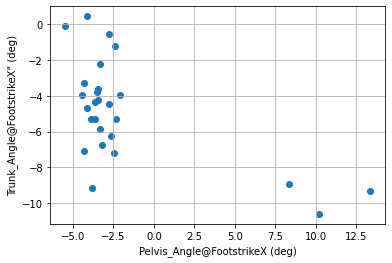

In [267]:
fig, ax = plt.subplots()
ax.scatter(biomechfast["Pelvis_Angle@FootstrikeX"], biomechfast["Trunk_Angle@FootstrikeX"])
ax.set(xlabel='Pelvis_Angle@FootstrikeX (deg)', ylabel='Trunk_Angle@FootstrikeX" (deg)')
ax.grid()

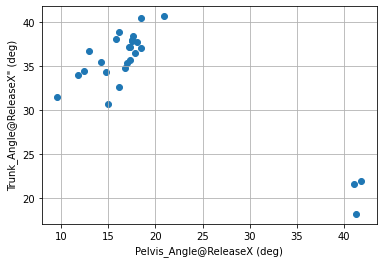

In [268]:
figure, bx = plt.subplots()
bx.scatter(biomechfast["Pelvis_Angle@ReleaseX"], biomechfast["Trunk_Angle@ReleaseX"])
bx.set(xlabel='Pelvis_Angle@ReleaseX (deg)', ylabel='Trunk_Angle@ReleaseX" (deg)')
bx.grid()

In [269]:
# Encode 15 min intervals 12:00-3:00
# 1 = 12:00, 2 = 12:15, 3 = 12:30, ...
# One new column with coded Tilt numbers
# Convert Tilt to strings

playerfb['Tilt'] = playerfb['Tilt'].astype(str)

def Tilt_Code(playerfb):
    
    if playerfb['Tilt'] == "12:00":
        return 0
    if playerfb['Tilt'] == "12:15":
        return 0.25
    if playerfb['Tilt'] == "12:30":
        return 0.5
    if playerfb['Tilt'] == "12:45":
        return 0.75
    if playerfb['Tilt'] == "1:00":
        return 1
    if playerfb['Tilt'] == "1:15":
        return 1.25
    if playerfb['Tilt'] == "1:30":
        return 1.5
    if playerfb['Tilt'] == "1:45":
        return 1.75
    if playerfb['Tilt'] == "2:00":
        return 2
    if playerfb['Tilt'] == "2:15":
        return 2.25
    if playerfb['Tilt'] == "2:30":
        return 2.5
    if playerfb['Tilt'] == "2:45":
        return 2.75
    if playerfb['Tilt'] == "3:00":
        return 3
    
    # Is there a way to iterate this in a for loop easily???
    
playerfb['Tilt_Code'] = playerfb[['Tilt']].apply(Tilt_Code,axis=1)
playerfb

<ipython-input-269-0f714c97d9f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerfb['Tilt'] = playerfb['Tilt'].astype(str)
<ipython-input-269-0f714c97d9f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerfb['Tilt_Code'] = playerfb[['Tilt']].apply(Tilt_Code,axis=1)


,PitchNo,Year,Date,Time,PitcherId,PitcherThrows,PitcherTeam,PitcherSet,TaggedPitchType,PitchSession,...,cluster,clusterSC,TrueSpin,szTop,szBot,isScrimmage,DateForBatters,DateForPitchers,Throws,Tilt_Code
79,1,Fall_2020,8/28/20,17:07:37,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,2,Fall_2020,8/28/20,17:08:19,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,4,Fall_2020,8/28/20,17:10:09,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,5,Fall_2020,8/28/20,17:10:53,1.001896e+07,Right,WAK_DEA,Windup,Sinker,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,6,Fall_2020,8/28/20,17:11:24,1.001896e+07,Right,WAK_DEA,Windup,Sinker,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34066,275,Fall_2020,10/23/2020,6:22:44 PM,1.000093e+09,Right,WAK_DEA,Stretch,Sinker,NaN,...,NaN,NaN,1838.586882,NaN,NaN,NaN,NaN,NaN,NaN,1.75
34067,276,Fall_2020,10/23/2020,6:23:35 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,NaN,NaN,2217.636829,NaN,NaN,NaN,NaN,NaN,NaN,0.75
34068,277,Fall_2020,10/23/2020,6:24:12 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,NaN,NaN,2148.173452,NaN,NaN,NaN,NaN,NaN,NaN,1.00
34069,278,Fall_2020,10/23/2020,6:24:42 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,NaN,NaN,2049.617728,NaN,NaN,NaN,NaN,NaN,NaN,0.75


[(0.0, 3.0)]

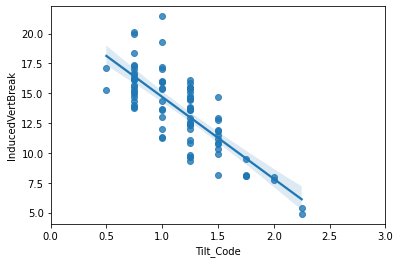

In [270]:
# Plot Tilt Code vs InducedVertBreak

tiltvert = sns.regplot(x="Tilt_Code", y="InducedVertBreak", data=playerfb)
tiltvert.set(xlim = (0, 3))

[(0.0, 3.0)]

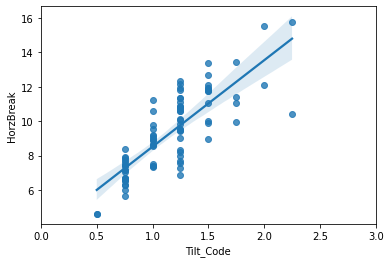

In [271]:
# Plot Tilt Code vs HorzBreak

tiltvert = sns.regplot(x="Tilt_Code", y="HorzBreak", data=playerfb)
tiltvert.set(xlim = (0, 3))

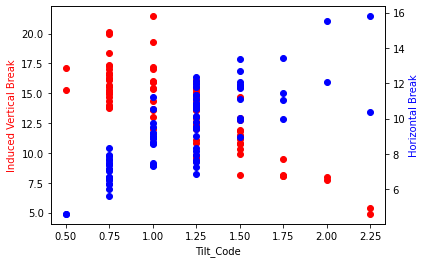

In [272]:
# Plot Tilt Clock vs InducedVertBreak and HorzBreak

fig,cx = plt.subplots()
cx.scatter(playerfb["Tilt_Code"], playerfb["InducedVertBreak"], color='red')
cx.set_xlabel("Tilt_Code")
cx.set_ylabel("Induced Vertical Break", color='red')
cx2=cx.twinx()
cx2.scatter(playerfb["Tilt_Code"], playerfb["HorzBreak"], color='blue')
cx2.set_ylabel("Horizontal Break", color='blue')
plt.show()

In [273]:
# EDA and Predicitive modeling